<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobVegaTec/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

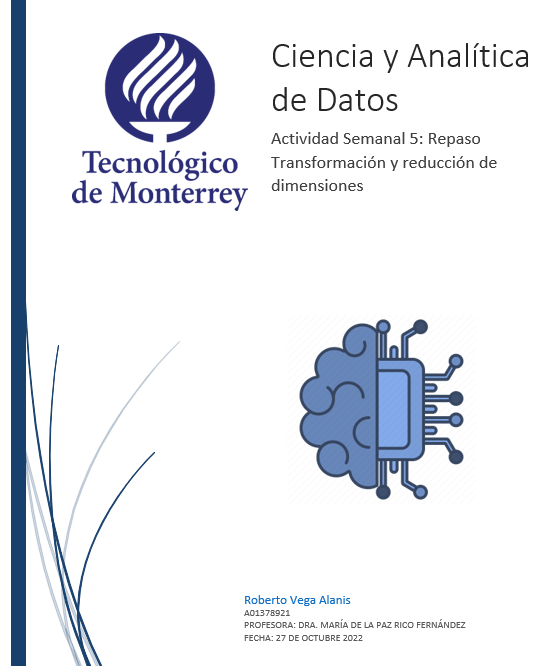

Alumno: Roberto Vega Alanis

Matrícula: A01378921

Link al presente Notebook:
https://colab.research.google.com/drive/1pwy6dXEIFX2QwM8UhVfiJ5MUIzvd1FtT#scrollTo=OsSqtOwXpMdi

Link a repositorio de GitHub:


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




In [ ]:
A_1 = array([[3,0,2], [3,0,-2], [0,1,1]])
A_2 = array([[1,3,8], [2,0,0], [0,0,1]])
A_3 = array([[5,4,0], [1,0,1], [10,7,1]])

# Eigenvalores y eigenvectores

In [4]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W.dot(D).dot(Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [40]:
#Matriz 1

A_1 = array([[3,0,2], [3,0,-2], [0,1,1]])

print("-------Matriz original-------")
print(A_1)
print("-----------------------------")

# Calcula la eigendescomposición
values, vectors = eig(A_1)
print(values) #D
print(vectors) #W

# Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A_1) # obtención de los eigen vectores y los valores eigen.
W = vectors # guardan los eigen vectores en una matriz de dimensiones mXm (m = número de atributos, columnas)
Winv = np.linalg.inv(W) # obtención de la inversa de los eigen vectores
D = np.diag(values) # los valores eigen se incorporan a una matri diagonal (en donde los eigen valores forman parte de la diagonal principal, mientras que el resto son 0's)

# Reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Para la reconstrucción se realiza la multiplicación matricial de los eigenvectores, la matriz diagonal de valores y la inversa de la matriz de eigenvectores (en ese orden)
# (cabe recordar que la función .dot() de mupy sobre arreglos bidimensionales es equivaente a la operación np.matmul())
B_1 = W.dot(D).dot(Winv)
print(np.around(B_1.real))
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [41]:
#Matriz 2

A_2 = array([[1,3,8], [2,0,0], [0,0,1]])

print("-------Matriz original-------")
print(A_2)
print("-----------------------------")

# Calcula la eigendescomposición
values, vectors = eig(A_2)
print(values) #D
print(vectors) #W

# Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A_2) # obtención de los eigen vectores y los valores eigen.
W = vectors # guardan los eigen vectores en una matriz de dimensiones mXm (m = número de atributos, columnas)
Winv = np.linalg.inv(W) # obtención de la inversa de los eigen vectores
D = np.diag(values) # los valores eigen se incorporan a una matri diagonal (en donde los eigen valores forman parte de la diagonal principal, mientras que el resto son 0's)

# Reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Para la reconstrucción se realiza la multiplicación matricial de los eigenvectores, la matriz diagonal de valores y la inversa de la matriz de eigenvectores (en ese orden)
# (cabe recordar que la función .dot() de mupy sobre arreglos bidimensionales es equivaente a la operación np.matmul())
B_2 = W.dot(D).dot(Winv)
print(np.around(B_2.real))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [42]:
#Matriz 3

A_3 = array([[5,4,0], [1,0,1], [10,7,1]])

print("-------Matriz original-------")
print(A_3)
print("-----------------------------")

# Calcula la eigendescomposición
values, vectors = eig(A_3)
print(values) #D
print(vectors) #W

# Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A_3) # obtención de los eigen vectores y los valores eigen.
W = vectors # guardan los eigen vectores en una matriz de dimensiones mXm (m = número de atributos, columnas)
Winv = np.linalg.inv(W) # obtención de la inversa de los eigen vectores
D = np.diag(values) # los valores eigen se incorporan a una matri diagonal (en donde los eigen valores forman parte de la diagonal principal, mientras que el resto son 0's)

# Reconstruye la matriz 
# Para la reconstrucción se realiza la multiplicación matricial de los eigenvectores, la matriz diagonal de valores y la inversa de la matriz de eigenvectores (en ese orden)
# (cabe recordar que la función .dot() de mupy sobre arreglos bidimensionales es equivaente a la operación np.matmul())
print("-------Matriz reconstruida-------")
B_3 = W.dot(D).dot(Winv)
print(np.around(B_3.real))
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


Notas importantes:
* Cabe resaltar que los valores de las matrices de los eigen vectores y valores incluyen una j ya que es posible relizar estas operaciones con números imaginarios. Sin embargo, al introducir únicamente valores reales, nuestro modelos siempre debería mantener los coeficientes de j en 0, por lo que se decidió tomar sólo la parte real de los resultados.
* Por lo anterior y considerando la pédida de exactitud que se genera al aplicar varias transformaciones, se decidió redondear los valores resultantes.
* Con estos ejercicios se comprueba que con los eigen vectores y valores, es posible reconstruir una matriz.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


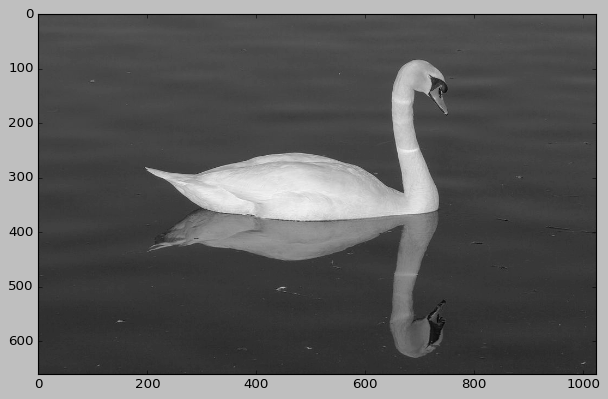

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F35DEA782D0>


In [9]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [10]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [11]:
U.shape

(660, 660)

In [12]:
V.shape

(1024, 1024)

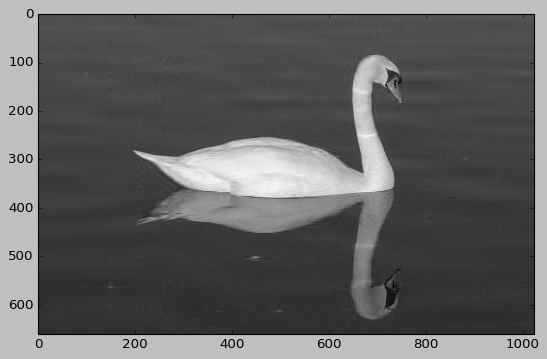

Felicidades la imagen está comprimida


In [13]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[227. 226. 226. ...  76.  73.  69.]
Imagen original


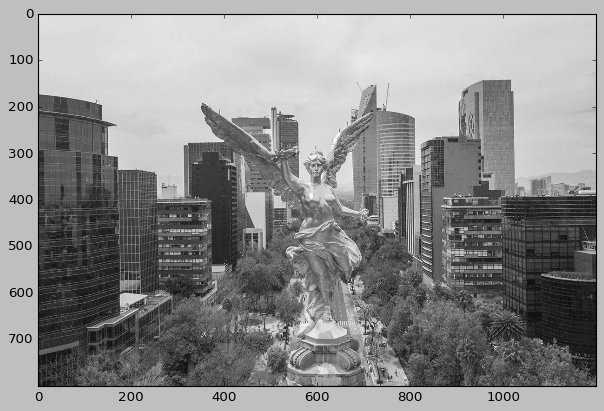

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F35DEA782D0>

Dimensiones imagen original:  (800, 1200)
Dimensiones U:  (800, 800)
Dimensiones D:  (800,)
DImensones V:  (1200, 1200) 

Valor de compresión:  150
Imagen comprimida


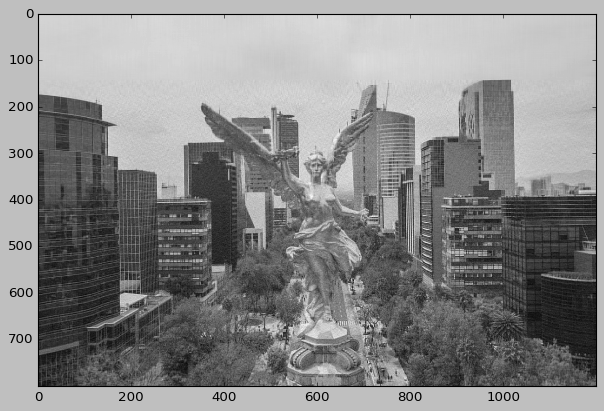


Dimensiones U reducida:
 (800, 150)
Dimensiones D reducida (después de ser convertida en matriz diagonal):
 (150, 150)
Dimensiones V reducida:
 (150, 1200)


In [35]:
#imagen 1

# Obtenermos la imagen de un link
img_1 = Image.open(urllib.request.urlopen('https://lonelyplanetes.cdnstatics2.com/sites/default/files/styles/max_1300x1300/public/fotos/mexico_ciudaddemexico_paseoreforma_angelindependencia_shutterstockrf_1066463744_aberu.go_shutterstock.jpg?itok=MjJFsqoK'))

# Convertimos a escala de grises (para evitar trabajar con tensores)
imggray_1 = img_1.convert('LA')

# Obtenemos la matriz de pixeles de la imagen
imgmat_1 = np.array(list(imggray_1.getdata(band=0)),float)
print(imgmat_1)
# Redimensionamos imagen para imprimirla
imgmat_1.shape = (imggray_1.size[1],imggray_1.size[0])

# Imprimimos imagen original
print('Imagen original')
plt.figure(figsize=(9,6))
plt.imshow(imgmat_1,cmap='gray')
plt.show()
print(img)

# Obtenemos matrices unitarias y matriz de valores únicos
U,D,V = np.linalg.svd(imgmat_1)

# Impresión de dimansiones de componentes
print('\nDimensiones imagen original: ',imgmat_1.shape)
print('Dimensiones U: ',U.shape)
print('Dimensiones D: ',D.shape)
print('DImensones V: ',V.shape, '\n')

# Elegimos un valor para reducir la dimensionalidad
nvalue = 150
print('Valor de compresión: ',nvalue)
# Reconstruimos la imagen con matricesunitarias (U,V) y diagonal (D), reduciendo el tamaño de la matriz D (así como el número de columnas de U y filas de Y)
reconstimg_1 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

# imprimimos imagen reconstruida
print('Imagen comprimida')
plt.figure(figsize=(9,6))
plt.imshow(reconstimg_1,cmap='gray')
plt.show()

#Impresioón de las matrices
print('\nDimensiones U reducida:\n',np.matrix(U[:,:nvalue]).shape)
print('Dimensiones D reducida (después de ser convertida en matriz diagonal):\n',np.diag(D[:nvalue]).shape)
print('Dimensiones V reducida:\n',np.matrix(V[:nvalue,:]).shape)

[120.  75.  39. ...  52.  54.  55.]
Imagen original


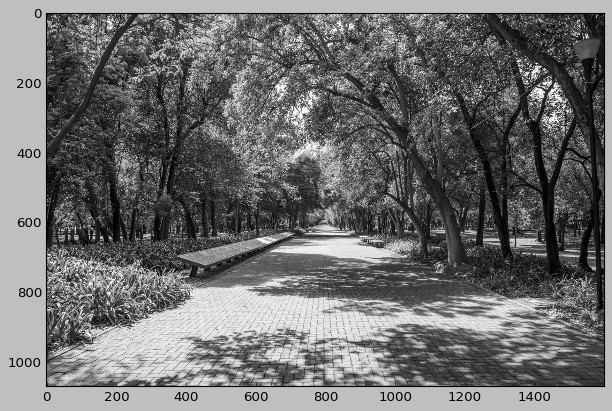

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F35DEA782D0>

Dimensiones imagen original:  (800, 1200)
Dimensiones U:  (1067, 1067)
Dimensiones D:  (1067,)
DImensones V:  (1600, 1600) 

Valor de compresión:  500
Imagen comprimida


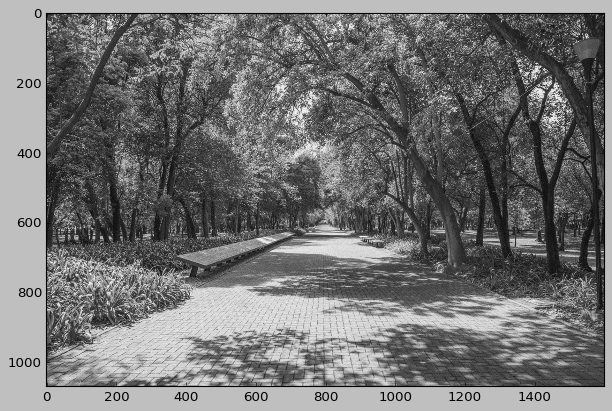


Dimensiones U reducida:
 (1067, 500)
Dimensiones D reducida (después de ser convertida en matriz diagonal):
 (500, 500)
Dimensiones V reducida:
 (500, 1600)


In [43]:
#imagen 2

#Obtenemos imagen
img_2 = Image.open(urllib.request.urlopen('https://www.mexicoescultura.com/galerias/espacios/principal/bosque.jpg'))

# Convertimos a escala de grises (para evitar trabajar con tensores)
imggray_2 = img_2.convert('LA')

# Obtenemos la matriz de pixeles de la imagen
imgmat_2 = np.array(list(imggray_2.getdata(band=0)),float)
print(imgmat_2)
# Redimensionamos imagen para imprimirla
imgmat_2.shape = (imggray_2.size[1],imggray_2.size[0])

# Imprimimos imagen original
print('Imagen original')
plt.figure(figsize=(9,6))
plt.imshow(imgmat_2,cmap='gray')
plt.show()
print(img)

# Obtenemos matrices unitarias y matriz de vaores únicos
U,D,V = np.linalg.svd(imgmat_2)

# Impresión de dimansiones de componentes
print('\nDimensiones imagen original: ',imgmat_1.shape)
print('Dimensiones U: ',U.shape)
print('Dimensiones D: ',D.shape)
print('DImensones V: ',V.shape, '\n')

# Elegimos un valor para reducir la dimensionalidad
nvalue = 500
print('Valor de compresión: ',nvalue)
# Reconstruimos la imagen con matricesunitarias (U,V) y diagonal (D), reduciendo el tamaño de la matriz D (así como el número de columnas de U y filas de Y)
reconstimg_2 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

# imprimimos imagen reconstruida
print('Imagen comprimida')
plt.figure(figsize=(9,6))
plt.imshow(reconstimg_2,cmap='gray')
plt.show()

#Impresioón de las matrices
print('\nDimensiones U reducida:\n',np.matrix(U[:,:nvalue]).shape)
print('Dimensiones D reducida (después de ser convertida en matriz diagonal):\n',np.diag(D[:nvalue]).shape)
print('Dimensiones V reducida:\n',np.matrix(V[:nvalue,:]).shape)

[ 27.  44.  55. ... 218. 218. 218.]
Imagen original


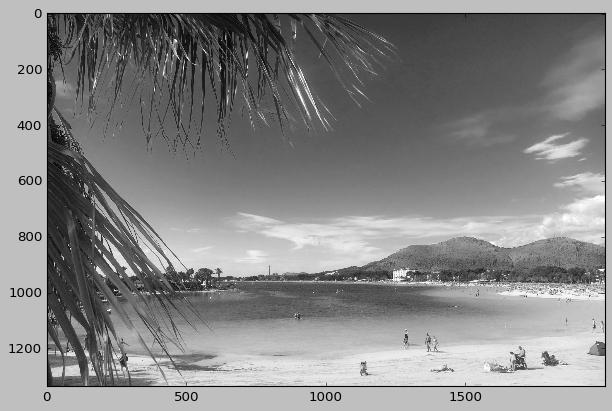

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F35DEA782D0>

Dimensiones imagen original:  (296, 474)
Dimensiones U:  (1334, 1334)
Dimensiones D:  (1334,)
DImensones V:  (2000, 2000) 


Dimensiones imagen original:  (296, 474)
Dimensiones U:  (1334, 1334)
DImensones V:  (2000, 2000) 

Valor de compresión:  200
Imagen comprimida


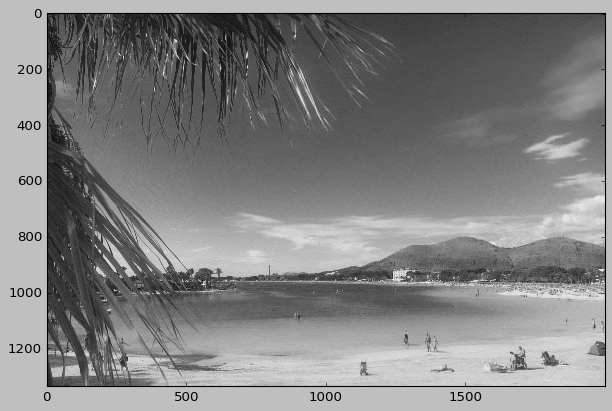


Dimensiones U reducida:
 (1334, 200)
Dimensiones D reducida (después de ser convertida en matriz diagonal):
 (200, 200)
Dimensiones V reducida:
 (200, 2000)


In [30]:
#imagen 3

# Obtenemos imagen
img_3 = Image.open(urllib.request.urlopen('https://e00-telva.uecdn.es/assets/multimedia/imagenes/2017/03/02/14884561228339.jpg'))

# Convertimos a escala de grises (para evitar trabajar con tensores)
imggray_3 = img_3.convert('LA')

# Obtenemos la matriz de pixeles de la imagen
imgmat_3 = np.array(list(imggray_3.getdata(band=0)),float)
print(imgmat_3)
# Redimensionamos imagen para imprimirla
imgmat_3.shape = (imggray_3.size[1],imggray_3.size[0])

# Imprimimos imagen original
print('Imagen original')
plt.figure(figsize=(9,6))
plt.imshow(imgmat_3,cmap='gray')
plt.show()
print(img)

# Obtenemos matrices unitarias y matriz de vaores únicos
U,D,V = np.linalg.svd(imgmat_3)

# Impresión de dimansiones de componentes
print('\nDimensiones imagen original: ',imgmat_1.shape)
print('Dimensiones U: ',U.shape)
print('Dimensiones D: ',D.shape)
print('DImensones V: ',V.shape, '\n')

# Impresión de componentes
print('\nDimensiones imagen original: ',imgmat_1.shape)
print('Dimensiones U: ',U.shape)
print('DImensones V: ',V.shape, '\n')

# Elegimos un valor para reducir la dimensionalidad
nvalue = 200
print('Valor de compresión: ',nvalue)
# Reconstruimos la imagen con matricesunitarias (U,V) y diagonal (D), reduciendo el tamaño de la matriz D (así como el número de columnas de U y filas de Y)
reconstimg_3 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

# imprimimos imagen reconstruida
print('Imagen comprimida')
plt.figure(figsize=(9,6))
plt.imshow(reconstimg_3,cmap='gray')
plt.show()

#Impresioón de las matrices
print('\nDimensiones U reducida:\n',np.matrix(U[:,:nvalue]).shape)
print('Dimensiones D reducida (después de ser convertida en matriz diagonal):\n',np.diag(D[:nvalue]).shape)
print('Dimensiones V reducida:\n',np.matrix(V[:nvalue,:]).shape)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [46]:
# importación de paquetes
import numpy as np # para operaciones con matrices
import matplotlib.pyplot as plt # para imprimir gráficas
from sklearn import datasets # para obtener el dataset iris
from sklearn.decomposition import PCA # para llamar el objeto PCA
import pandas as pd # para manejo del data set
from sklearn.preprocessing import StandardScaler # para escalar los datos (con el fin de obtener media = 0 y desviació estándar = 1)

# Selección de estilo de gráficos
plt.style.use('ggplot')

# Carga de los datos
iris = datasets.load_iris()

# Separamos features (variables independientes) de variable objetivo (dependiente)
X = iris.data
y = iris.target

# Se hace un escalamiento z a los valores (Z-score) con el fin de obtener media = 0 y desviació estándar = 1
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=2) # creamos el objeto con solo 2 componentes
X_new = pca.fit_transform(X) # se proyectan los datos originales en el nuevo espacio de PCA

In [49]:
# Imprimimos las dimensiones de los datos originales
iris['data'].shape

(150, 4)

Por lo tanto, el número mpaximo de compnentes podría ser 4, ya que ese es el número de features existentes (siendo que son menores al números de muestras)

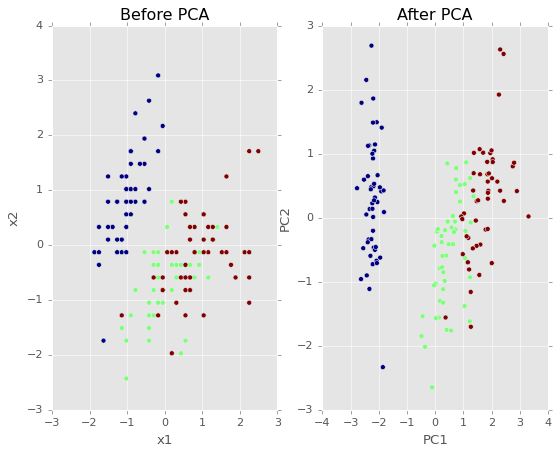

In [50]:
fig, axes = plt.subplots(1,2)

# mpresión de valores originales
axes[0].scatter(X[:,0], X[:,1], c=y) # gráfica de puntos; el eje X contiene elprimer feature, el eje Y contiene el segundo feature. Coloreamos los puntos de acuerdo a la clase a la que pertenecen (variable objetivo)
# Agregarmos nombre a los ejes de lá gráfica e incluimos un título a la misma
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

# Impresón de valores proyectados
axes[1].scatter(X_new[:,0], X_new[:,1], c=y) # gráfica de puntos; el eje X contiene elprimer feature, el eje Y contiene el segundo feature. Coloreamos los puntos de acuerdo a la clase a la que pertenecen (variable objetivo)
# Agregarmos nombre a los ejes de lá gráfica e incluimos un título a la misma
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')

plt.show()

Se puede observar que, a pesar de que los puntos proyectados no se encuentran exactamente igual que los datso originales, mantienenuna distribución relativamente similar eincluso una separación más marcada entre clases.

In [51]:
# Se expresa la varianza que contiene cada componente principal
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


El primar componente contiene el 72.9% de la variabilidad total de los datos, mientras que el segundo componente contiene el 22.9%, en total contienen alrededor del 96% de la variabilidad de los datos originales.

In [54]:
# Comprobación de la equivalencia entre los vectores eigen de la matriz original de covarianza y las varianzas de espacio reducido

print('Matriz de covarianza de datos proyectados:',np.cov(X_new.T),'\n')

print('Valores eigen: ',pca.explained_variance_)

Matriz de covarianza de datos proyectados: [[2.93808505e+00 5.33928780e-16]
 [5.33928780e-16 9.20164904e-01]] 

Valores eigen:  [2.93808505 0.9201649 ]


Los valores eigen son iguales a la diagonal principal de la matriz de covarianza, con esto se comprueba la equivalencia

In [55]:
# Importancia de los features para cada componente principal

print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Sabiendo que cada fila de los componentes de pcs representa cada uno de los componentes principales mientras que las "columnas" respresentan los features, se puede observar que para el primer componente principal el 3er, 4to y 1er features, con los más importantes (a mayor valor, mayor importancia).

Por otra parte, para el segundo componente principal, el valor más importante son el segundo y primer feature.

In [57]:
# Función local para impresión de biplot
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # proyección sobre PC1 (valores paar el eje x)
    ys = score[:,1] # proyección sobre PC2 (valores paar el eje 2)
    n = coeff.shape[0] # número de variables
    plt.figure(figsize=(10,8), dpi=100) # inicializa espacio pára gráfica
    
    # Asigna colores marcas a clases de variable objetivo
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']

    # Por cada clase imprime cada uno de sus puntos con un formato específico
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    
    # Por cada variable, imprimir una línea desde el origen del sistema hast las coordenadas de su eigen vector correspondiente
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    # Formato de gráfico
    plt.xlabel("PC{}".format(1), size=14) # nombre de eje x
    plt.ylabel("PC{}".format(2), size=14) # nombre de eje y
    limx= int(xs.max()) + 1 # crear limites en eje x
    limy= int(ys.max()) + 1 # crear limites en eje y
    plt.xlim([-limx,limx]) # delimitar valores de eje x acorde a los datos de entrada
    plt.ylim([-limy,limy]) # delimitar valores de eje y acorde a los datos de entrada
    plt.grid() # incluir malla
    plt.tick_params(axis='both', which='both', labelsize=14)


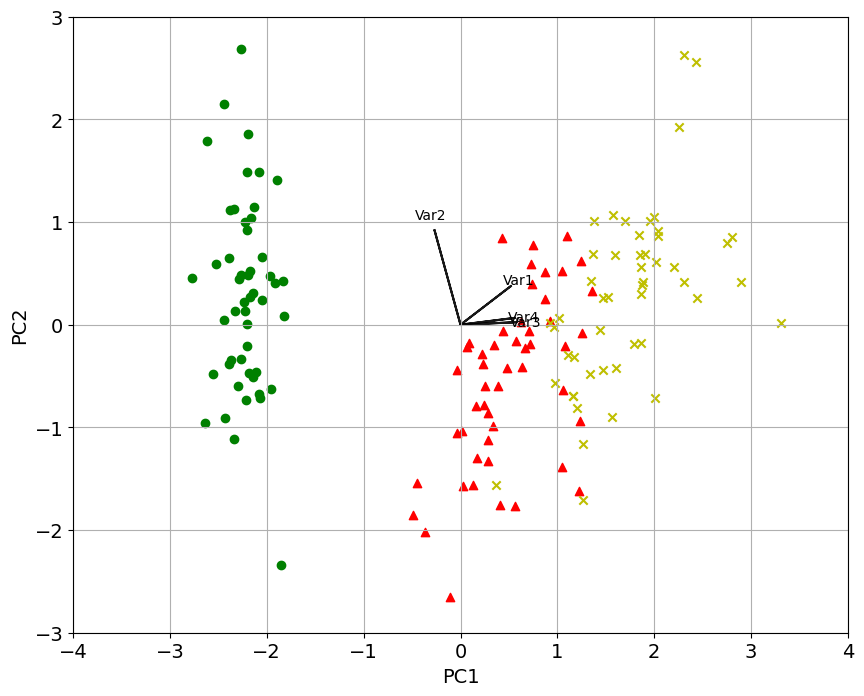

In [59]:
# Llamamos a la función anterior sobre nuestros datos
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style

# Llamamos la función biplot solo para los rimeros 2 componentes principales
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Al  observar el gráfico, se puede observar que:
* Las variables 4, 3 y 1 son importantes para el componente principal 1 (PC1) mientras que la variable 2 y 1 lo son para el PC2.
* Las variables 3 y 4 están muy correlacionadas.
* Las variables 2 y 3 están negativamente correlacionadas

Los 2 últimos puntos son comprobables con código

In [60]:
# Comprobación de lo observado con código

# Variable 3 y Variable 4 están muy correlacionadas (positivamente)
print(np.corrcoef(X[:,2], X[:,3])[1,0])

# Variable 2 y variable 3 están moderadamente correlacionadas (negativamente)
print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

* ¿Qué es feature importance y para que nos sirve?

Feature importance es el proceso de evaluación del impacto que tiene una cierta variable sobre la variabilidad total de un conjunto de datos proyectados que están definidos en función de varios atributos. Es decir, es el proceso que nos dice qué tan importantes son en realidad las variables originales. Después de la construcción de los componentes principales, podemos analizar los elementos de cada uno y al estar estos constituidos por un conjunto de coeficientes relacionados con cada una de las variables originales, los valores más grandes en cada vector del componente son aquellos más importantes para el mismo, es decir, que constituyen en una importante medida la variabilidad de los datos. Si quisiéramos saber cuál es el atributo que más genera variabilidad en los datos, deberíamos crear los eigen vectores y posteriormente revisar qué variable es la que contiene el valor de mayor magnitud (sin importar el signo) par el primer componente principal.

* ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

En primer lugar, el hallazgo de la correlación entre las variables fue de suma importancia ya que permite sabe qué variables son semejantes entre sí y cuáles, por el contrario, son independientes.

En segundo lugar, considero de un extremo valor la conceptualización del método de PCA como un conjunto de transformaciones lineales que simplifican la forma de representar los datos al “alinearse” mejor a la distribución de su variabilidad, propiciando la reducción de dimensiones necesarias para representar su comportamiento general.

En tercer lugar, considero de gran utilidad práctica el conocimiento de la identificación de los features principales, ya que permite realizar un análisis que suele ser de sumo interés en el análisis de causas principales par procesos tanto de mejora contina como de resolución de problemas.

* ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Un primer lugar en donde utilizaría este conocimiento sería en la reducción de atributos en un conjunto de datos con millones de datos y cientos de atributos (columnas). Al muchas veces estar limitado en la capacidad de procesamiento de los datos, el reducir el número de columnas manteniendo la variabilidad de los mismos podría ayuda a reducir la cantidad de memoria y poder de procesamiento necesario para la realización de análisis de los datos.
Una segunda aplicación que considero de amplia utilidad sería la identificación de causas principales. En cadena de suministro, al tener una enorme cantidad de variables en todo el proceso, es sumamente complicado poder determinar los generadores de cuellos de botella, es decir, los factores que contribuyen en mayor medida al retraso en el proceso productivo y de distribución. AL desarrollar un análisis como este podría analizarse cuales son los factores que más influencian y en qué sentido a alguna variable-objetivo predeterminada (generalmente relacionada con el tiempo).

Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.
Importante: Entrega en Canvas tu documento en formato PDF /liga del notebook en colab incluyendo las partes de la actividad.
